# **Library Import**
In this section, we import the necessary libraries required for our data analysis and machine learning tasks. Each library serves a specific purpose, such as data manipulation, visualization, preprocessing, model building, and evaluation.

Pandas: Used for data manipulation and analysis, especially for working with structured data in tabular form.
Matplotlib: A powerful visualization library in Python used to create static, interactive, and animated plots.
Scikit-learn (sklearn): A comprehensive machine learning library that provides tools for data preprocessing, feature selection, model building, evaluation, and more.
NumPy: A fundamental package for numerical computing in Python, used for performing mathematical operations on arrays and matrices efficiently.
Imbalanced-learn (imblearn): An extension of scikit-learn that provides methods for dealing with imbalanced datasets, such as oversampling, undersampling, and generating synthetic samples.
We also import specific modules and functions from these libraries based on our requirements, such as preprocessing tools (e.g., MinMaxScaler, StandardScaler), feature selection methods (e.g., VarianceThreshold, chi2), classification algorithms (e.g., RandomForestClassifier, LogisticRegression), evaluation metrics (e.g., classification_report, accuracy_score), and cross-validation utilities (e.g., cross_val_score).

In [1]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn import feature_selection
from sklearn.feature_selection import chi2


# **Data Loading**
In this section, we load the dataset from a CSV file hosted on GitHub into a pandas DataFrame. The dataset contains information related to British Airways bookings and is stored in a CSV format.

URL: We specify the URL of the CSV file containing the dataset. This URL points to the raw version of the file hosted on GitHub.
Read CSV: We use the pd.read_csv() function from the pandas library to read the CSV file into a DataFrame. We specify the encoding='latin1' parameter to ensure proper decoding of the CSV file, as it may contain non-ASCII characters.
If any issues occur during the reading process (e.g., missing file, encoding errors), an exception will be caught, and an error message will be displayed.
To handle specific issues like delimiter differences or problematic lines, additional parameters such as delimiter or error_bad_lines can be added to the read_csv() function.
The resulting DataFrame (df) contains the loaded data, which we can then use for exploration, preprocessing, analysis, or modeling tasks.

In [3]:
# URL pointing to the raw CSV file on GitHub
url = "https://github.com/peter0097/British_airways_booking_predicition/raw/main/British_Airways_Booking.csv"

# Read the CSV file into a pandas DataFrame
try:
    # Attempt to read the CSV file from the provided URL
    df = pd.read_csv(url, encoding='latin1')
    # If successful, the data is loaded into a DataFrame named 'df'
except Exception as e:
    # If any error occurs during the reading process, an exception is caught
    print("Error reading CSV file:", e)

# Display the DataFrame containing the loaded data
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# **Checking for Missing Values:**

The .isnull().sum() method creates a new DataFrame indicating the number of missing values present in each column. This helps us assess the extent of missing data and determine appropriate handling strategies, such as imputation or removal.
Checking for Duplicates:

The .duplicated() method identifies rows containing identical values across all columns, potentially signifying data redundancy. We can further investigate these duplicates to decide whether to keep or remove them.
Checking Data Types:

The .info() method provides a summary of the data types associated with each feature in the DataFrame. Understanding the data types is crucial for selecting appropriate analysis methods and ensuring data integrity.
By following these initial checks, we gain valuable insights into the quality of our data, allowing us to proceed with our analysis with more confidence and accuracy.

In [12]:
#Check for missing values.
df.isnull().sum()

#Checking for duplicate
duplicated = df.duplicated()

#Checking the datatypes of the different features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# **Data Preparation Before Sampling**
In this section, we prepare the data for sampling by separating the features (independent variables) and the target variable (dependent variable) from the DataFrame.

Features (X): We create a DataFrame X_before_sampling containing all the columns from the original DataFrame (df) except for the 'booking_complete' column. These columns represent the input features used to predict the target variable.
Target Variable (y): We create a Series y_before_sampling containing only the 'booking_complete' column from the original DataFrame (df). This column represents the target variable we want to predict.
By splitting the data into features and target variable, we can perform sampling techniques, such as oversampling or undersampling, on the appropriate subsets of the data to address any class imbalance issues or to prepare the data for modeling tasks.



In [ ]:
# Separate the features (X) and the target variable (y) before sampling
X_before_sampling = df.drop('booking_complete', axis=1)  # Features (X) excluding the 'booking_complete' column
y_before_sampling = df['booking_complete']  # Target variable (y) containing only the 'booking_complete' column

# Display the features DataFrame before sampling
X_before_sampling


# **Label Encoding of Categorical Variables**
In this section, we perform label encoding on the categorical variables in the features DataFrame (X_before_sampling). Label encoding is a preprocessing technique used to convert categorical variables into numerical format, which is required by many machine learning algorithms.

Function Definition: We define a function named label_encoding that takes a DataFrame (dframe) containing categorical variables as input.
LabelEncoder: We initialize a LabelEncoder object, which will be used to encode the categorical variables.
Encoding Process: We loop through each column in the DataFrame and check if the column contains categorical variables (i.e., if its data type is 'object'). If a column is categorical, we apply label encoding using the fit_transform() method of the LabelEncoder object.
Return Value: The function returns the DataFrame with categorical variables encoded using label encoding.
Application: We apply the label_encoding function to the features DataFrame (X_before_sampling) to encode the categorical variables.
By performing label encoding, we convert categorical variables into numerical format, making the data suitable for further analysis and modeling.

In [5]:
def label_encoding(dframe):
    """
    Encode categorical variables using LabelEncoder.

    Parameters:
    - dframe (DataFrame): Input DataFrame containing categorical variables.

    Returns:
    - DataFrame: DataFrame with categorical variables encoded using LabelEncoder.
    """
    label = LabelEncoder()  # Initialize a LabelEncoder object
    for column in dframe.columns:
        if dframe[column].dtype == 'object':
            dframe[column] = label.fit_transform(dframe[column])  # Encode categorical variables
    return dframe


In [ ]:
# Apply label encoding to the features DataFrame before sampling
X_before_sampling = label_encoding(X_before_sampling)

# Display the features DataFrame after label encoding
X_before_sampling


# **Synthetic Minority Over-sampling Technique (SMOTE)**
In this section, we use the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in the target variable (y_before_sampling). SMOTE is an oversampling technique that generates synthetic samples for the minority class to balance the class distribution.

Initialization: We initialize the SMOTE object with the desired sampling strategy. The sampling_strategy parameter specifies the desired ratio of the number of samples in the minority class to the majority class. Setting it to 'auto' allows SMOTE to automatically adjust the sampling strategy based on the class distribution.
Sampling Process: We apply SMOTE to the features (X_before_sampling) and target variable (y_before_sampling) using the fit_resample() method. This method generates synthetic samples for the minority class to achieve a balanced class distribution.
Output: The resampled features (X_resampled) and target variable (y_resampled) are obtained after applying SMOTE. These resampled datasets can be used for training machine learning models to mitigate the impact of class imbalance.
By using SMOTE, we effectively address class imbalance in the dataset, which can improve the performance of machine learning models, especially those sensitive to class distribution.

In [8]:
# Initialize SMOTE with desired sampling strategy
smote = SMOTE(sampling_strategy='auto')

# Apply SMOTE to resample the data to address class imbalance
# X_before_sampling: Features DataFrame before sampling
# y_before_sampling: Target variable (labels) before sampling
X_resampled, y_resampled = smote.fit_resample(X_before_sampling, y_before_sampling)


# **Class Distribution After SMOTE**
In this section, we analyze the distribution of class labels in the target variable (y_resampled) after applying SMOTE. We count the occurrences of each class label to understand the balance achieved by the oversampling technique.

Class Label Counts: We use NumPy's np.unique() function with the return_counts=True parameter to obtain the unique class labels (unique_classes) and their corresponding counts (class_counts) in the resampled target variable (y_resampled).
Printing Class Counts: We iterate through each unique class label and its corresponding count using a for loop. For each class label, we print the label and the number of instances (samples) belonging to that class.
By examining the class distribution after SMOTE, we can verify whether the oversampling technique effectively balanced the class distribution and whether the dataset is suitable for training machine learning models.



In [ ]:
# Count the occurrences of each class label
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Print the class labels and their corresponding counts
for label, count in zip(unique_classes, class_counts):
    print(f"Class {label}: {count} instances")

# **Train-Test Split with Stratification**
In this section, we split the resampled data into training and testing sets while maintaining the class distribution of the target variable (y) using stratification. Stratification ensures that the proportion of different classes in the target variable is preserved in both the training and testing sets, which is essential for maintaining the representativeness of the data.

Data Splitting: We use the train_test_split() function from scikit-learn to split the resampled features (X) and target variable (y) into training and testing sets. We specify the test_size parameter to allocate 20% of the data to the testing set.
Stratification: By setting the stratify parameter to y, we ensure that the class distribution of the target variable is preserved in both the training and testing sets. This is particularly important for imbalanced datasets to prevent bias in model evaluation.
Random State: We set the random_state parameter to 10 to seed the random number generator, ensuring reproducibility of the data split. The same random state will produce the same split each time the code is executed.
Training Set Features: We display the features of the training set (X_train) to inspect the subset of data that will be used for model training.
By splitting the data into training and testing sets with stratification, we ensure that our machine learning model is trained and evaluated on representative samples of the data, leading to more reliable performance metrics.

In [ ]:
# Split the data into training and testing sets, maintaining the class distribution using stratification
# X: Features (resampled)
# y: Target variable (resampled)
# test_size: Proportion of the dataset to include in the testing split (20%)
# stratify: Ensures that the class distribution of the target variable is preserved in the split
# random_state: Seed for random number generation for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Display the features of the training set
X_train


# **Feature Scaling with StandardScaler**
In this section, we apply feature scaling to the training and testing sets using the StandardScaler. Feature scaling is a preprocessing technique that standardizes the range of independent variables (features) in the data, making them more comparable and improving the performance of certain machine learning algorithms.

Initialization: We initialize a StandardScaler object named standard_scaler to perform feature scaling.
Fitting the Scaler: We fit the StandardScaler to the training data (X_train) using the fit_transform() method. This step calculates the mean and standard deviation of each feature in the training set and applies the scaling transformation simultaneously.
Transforming the Data: We transform both the training and testing data using the fitted StandardScaler. It ensures that the same scaling parameters obtained from the training set are applied consistently to the testing set.
Scaled Features: We display the scaled features of the training set (scaled_train) to examine the effect of feature scaling on the data. Scaled features typically have a mean of 0 and a standard deviation of 1 after scaling.
By applying feature scaling using the StandardScaler, we ensure that the features have similar scales, which can lead to improved convergence and performance of machine learning models, particularly those sensitive to feature magnitudes.



In [ ]:
#Initiating the scaler; StandardScaler
standard_scaler = StandardScaler()

#Fitting the various scalers
scaled_train = standard_scaler.fit_transform(X_train)

scaled_test = standard_scaler.fit_transform(X_test)

scaled_train

# **Creating DataFrames for Scaled Features**
In this section, we create DataFrames to store the scaled features of the training and testing sets. Each DataFrame will have columns representing the features, with the scaled values obtained after applying the StandardScaler.

DataFrame Creation: We use the pd.DataFrame() function to create DataFrames for both the scaled training and testing sets. We provide the scaled feature arrays (scaled_train and scaled_test) as the data, and specify the column names using X.columns, which contains the original column names of the features DataFrame (X).
Scaled Features: Each DataFrame (scaled_train_df and scaled_test_df) will have rows corresponding to samples and columns representing the features. The values in each cell represent the scaled values of the corresponding feature for each sample.
Displaying the DataFrame: We display the DataFrame of scaled features for the training set (scaled_train_df) to inspect the scaled data. This allows us to verify that the scaling transformation has been applied correctly.
By creating DataFrames for the scaled features, we can easily manipulate and analyze the scaled data, facilitating further preprocessing and modeling tasks.



In [ ]:
# Creating DataFrames for the scaled training and testing sets
# scaled_train: Scaled features of the training set
# scaled_test: Scaled features of the testing set
# X.columns: Column names of the original features DataFrame (assuming X is the original features DataFrame)
scaled_train_df = pd.DataFrame(scaled_train, columns=X_train.columns)
scaled_test_df = pd.DataFrame(scaled_test, columns=X_train.columns)

# Displaying the DataFrame of scaled features for the training set
scaled_train_df


# **Finding the Best Threshold for Variance Thresholding**
In this section, we aim to find the optimal threshold value for variance thresholding by evaluating the performance of a RandomForestClassifier model with different thresholds.

Threshold Values: We define an array threshold_values containing threshold values ranging from 0.1 to 1.0 with a step size of 0.1. These values represent the variance threshold to be applied to select features.
Model Initialization: We initialize a RandomForestClassifier model to be used for evaluating feature selection performance.
Loop Over Threshold Values: We iterate over each threshold value in the threshold_values array. For each threshold:
We initialize a VarianceThreshold object with the current threshold value.
We apply the variance thresholding to select features from the dataset (X).
We compute the mean cross-validated accuracy score using RandomForestClassifier with the selected features.
We append the accuracy score to the accuracy_scores list.
We print the current threshold value and its corresponding accuracy score.
Best Threshold Selection: After evaluating all threshold values, we find the best threshold based on the highest accuracy score obtained. We use the np.argmax() function to retrieve the index of the maximum accuracy score in the accuracy_scores list and then select the corresponding threshold value from threshold_values.
By systematically evaluating the performance of different threshold values, we can identify the optimal threshold for variance thresholding, which maximizes the accuracy of the RandomForestClassifier model.

In [ ]:
# Define an array of threshold values ranging from 0.1 to 1.0 with a step size of 0.1
threshold_values = np.arange(0.1, 1.1, 0.1)

# Initialize a RandomForestClassifier model
model = RandomForestClassifier()

# Initialize an empty list to store accuracy scores for each threshold
accuracy_scores = []

# Iterate over each threshold value
for threshold in threshold_values:
    # Initialize a VarianceThreshold object with the current threshold value
    variance_selector = VarianceThreshold(threshold=threshold)

    # Apply the variance thresholding to select features
    X_selected = variance_selector.fit_transform(X_train)

    # Compute the mean cross-validated accuracy score using RandomForestClassifier
    accuracy = np.mean(cross_val_score(model, X_selected, y_train, cv=5, scoring='accuracy'))

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

    # Print the current threshold and its corresponding accuracy score
    print(f"Threshold: {threshold}, Accuracy Score: {accuracy}")

# Find the best threshold based on the highest accuracy score
best_threshold = threshold_values[np.argmax(accuracy_scores)]
print(f"Best Threshold: {best_threshold}")

# **Feature Selection by Variance Thresholding**
In this section, we perform feature selection based on the variance threshold obtained from previous analysis. Features with variance below the threshold are removed from the training set.

Variance Thresholding: We initialize a VarianceThreshold object with the best_threshold obtained earlier. This threshold is used to select features based on their variance.
Removing Low-Variance Features: We apply the variance thresholding to the training set (X_train) using the fit_transform() method. Features with variance below the threshold are removed, and the transformed dataset (X_remove_variance) contains only the selected features.
Selected Feature Indices and Names: We retrieve the indices and names of the selected features using the get_support() method. These indices and names correspond to the features retained after variance thresholding.
Creating DataFrames with Selected Features: We create new DataFrames (X_train_variance_selected and X_test_variance_selected) for the training and testing sets, respectively, containing only the selected features. This ensures that subsequent analyses and modeling are performed using the subset of features with sufficient variance.
Displaying the DataFrame: We display the DataFrame of the training set with selected features (X_train_variance_selected) to examine the effect of feature selection on the data.
By performing feature selection based on variance thresholding, we focus on retaining features that exhibit significant variation across the dataset, potentially improving the performance and interpretability of machine learning models.

In [ ]:
# Selecting by variance
threshold = best_threshold
variance_selector  = VarianceThreshold(threshold= threshold)

X_remove_variance = variance_selector.fit_transform(X_train)


selected_feature_indices = variance_selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Create a DataFrame of the remaining features after removing those with low variance
X_train_variance_selected = pd.DataFrame(scaled_train_df, columns=selected_feature_names)

X_test_variance_selected = pd.DataFrame(scaled_test_df, columns=selected_feature_names)



X_train_variance_selected

In [23]:
X_train_variance_selected.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'flight_duration'],
      dtype='object')

# **Feature Selection using SelectKBest**
In this section, we perform feature selection using the SelectKBest method, which selects the top k features based on a given score function. We choose the Chi-square (chi2) test as the score function and specify k=11 to retain 11 features.

Feature Selection Setup: We set up the feature selection process using the SelectKBest class from the feature_selection module. We specify the Chi-square test (chi2) as the score function and set k=11 to retain 11 features.
Applying Feature Selection: We apply the feature selection to the training data (X_train and y_train) using the fit_transform() method. This selects the top 11 features based on their scores calculated using the Chi-square test.
Selected Feature Indices and Names: We retrieve the indices and names of the selected features using the get_support() method. These indices and names correspond to the top 11 features selected by the SelectKBest method.
Creating DataFrames with Selected Features: We create new DataFrames (X_train_kbest_selected and X_test_kbest_selected) for the training and testing sets, respectively, containing only the selected features.
Displaying the DataFrame: We display the DataFrame of the training set with the selected features (X_train_kbest_selected) to inspect the effect of feature selection on the data.
By performing feature selection using SelectKBest, we focus on retaining the most informative features based on their scores derived from the Chi-square test, potentially improving the performance of machine learning models.

In [ ]:
# Set up feature selection using SelectKBest
# chi2: Score function for feature selection (Chi-square test for non-negative features)
# k: Number of features to retain (11 in this case)
selector_kbest = feature_selection.SelectKBest(score_func=chi2, k=11)

# Apply feature selection to the training data
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_kbest_indices = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_kbest_feature_names = X_train.columns[selected_kbest_indices]

# Create DataFrames for the training and testing sets with selected features
X_train_kbest_selected = pd.DataFrame(scaled_train_df, columns=selected_kbest_feature_names)
X_test_kbest_selected = pd.DataFrame(scaled_test_df, columns=selected_kbest_feature_names)

# Display the DataFrame of the training set with selected features
X_train_kbest_selected


# **Feature Importance Analysis with Random Forest Classifier**
In this section, we analyze the feature importance scores obtained from a trained Random Forest classifier.

Initializing Random Forest Classifier: We initialize a Random Forest classifier (rf_classifier) using the default parameters.
Training the Classifier: We train the Random Forest classifier using the training data (X_train and y_train).
Extracting Feature Importance: We extract the feature importance scores from the trained Random Forest model using the feature_importances_ attribute.
Creating a Dictionary: We create a dictionary (feature_importance_dict) to store the feature importance scores along with their respective indices.
Sorting Features by Importance: We sort the features based on their importance scores in descending order and select the top 10 features.
Getting Feature Names: We retrieve the names of the top 10 features from the training data based on their indices.
Printing Feature Importance: We print the names and importance scores of the top 10 features, providing insights into the relative importance of each feature in predicting the target variable.
By analyzing feature importance scores, we can identify the most informative features for the classification task, helping us understand the underlying patterns in the data and potentially improving model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_model = rf_classifier.fit(X_train, y_train)

# Get feature importance from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a dictionary to store feature importance scores with their respective indices
feature_importance_dict = {i: importance for i, importance in enumerate(feature_importance)}

# Sort the features based on their importance scores and get the top 10 features
top_ten_features_indices = sorted(feature_importance_dict, key=feature_importance_dict.get, reverse=True)[:11]

# Get the names of the top 10 features
top_ten_features_names = [X_train.columns[i] for i in top_ten_features_indices]

# Print the top 10 features and their importance scores
for feature_name, feature_index in zip(top_ten_features_names, top_ten_features_indices):
    print(f"Feature '{feature_name}' = {feature_importance_dict[feature_index]}")


# **Analyzing Feature Importance with Random Forest Classifier**
In this code block, we perform an analysis to determine the importance of features in predicting the target variable using a Random Forest classifier.

Initializing Random Forest Classifier: We start by importing the RandomForestClassifier from the ensemble module of scikit-learn. This classifier is known for its ability to handle complex datasets and provide insights into feature importance.
Defining the Feature Importance Function: We define a function called get_top_features that takes the training feature matrix (X_train), the target vector (y_train), and an optional parameter n to specify the number of top features to return. Inside this function:
We initialize a Random Forest classifier.
Train the classifier on the training data.
Extract the feature importance scores from the trained model using the feature_importances_ attribute.
Create a dictionary to store the feature importance scores along with their respective indices.
Sort the features based on their importance scores in descending order and select the top n features.
Return a dictionary containing the names of the top features and their importance scores.
Calling the Function: We call the get_top_features function with the training data X_train and y_train to obtain the top 10 features and their importance scores.
Printing Feature Importance: We print the names and importance scores of the top 10 features, providing insights into the relative importance of each feature in predicting the target variable.
Converting to DataFrame: Finally, we convert the dictionary of top features into a DataFrame (top_features_df) for better visualization and further analysis.
This analysis helps us identify the most informative features for the classification task, enabling us to understand the underlying patterns in the data and potentially improve the performance of our predictive model.

In [29]:
from sklearn.ensemble import RandomForestClassifier

def get_top_features(X_train, y_train, n=10):
    """
    Get the top features and their importance scores from a Random Forest classifier.

    Parameters:
        X_train (DataFrame): The feature matrix.
        y_train (Series): The target vector.
        n (int): Number of top features to return. Default is 10.

    Returns:
        dict: Dictionary containing the names of the top features and their importance scores.
    """
    # Initialize and train a Random Forest classifier
    rf_classifier = RandomForestClassifier()
    rf_model = rf_classifier.fit(X_train, y_train)

    # Get feature importance from the trained Random Forest model
    feature_importance = rf_classifier.feature_importances_

    # Create a dictionary to store feature importance scores with their respective indices
    feature_importance_dict = {i: importance for i, importance in enumerate(feature_importance)}

    # Sort the features based on their importance scores and get the top n features
    top_features_indices = sorted(feature_importance_dict, key=feature_importance_dict.get, reverse=True)[:n]

    # Get the names and importance scores of the top features
    top_features = {X_train.columns[i]: feature_importance_dict[i] for i in top_features_indices}

    return top_features



In [30]:
top_features = get_top_features(X_train, y_train, n=10)
print(top_features)

{'booking_origin': 0.173549929896519, 'purchase_lead': 0.14882275008110063, 'route': 0.14599084274347168, 'flight_duration': 0.12356964695671054, 'length_of_stay': 0.11395007421995647, 'flight_hour': 0.10292972112503625, 'flight_day': 0.0706984480876375, 'sales_channel': 0.034242317566244664, 'num_passengers': 0.03132880122248138, 'wants_in_flight_meals': 0.019051352935725654}


In [31]:
# Get the index of the most important feature
most_important_index = np.argmax(feature_importance)

# Get the name of the most important feature
most_important_feature_name = X_train.columns[most_important_index]

# Get the importance score of the most important feature
most_important_score = feature_importance[most_important_index]

# Print the name and importance score of the most important feature
print(f"Most Important Feature Name: {most_important_feature_name}")
print(f"Most Important Feature Importance Score: {most_important_score}")


Most Important Feature Name: booking_origin
Most Important Feature Importance Score: 0.17421217904032635


In [32]:
feature_series = pd.Series(top_features)

top_features_df = pd.DataFrame(feature_series)
top_features_df.reset_index(inplace= True)
top_features_df.columns = ['Feature','Importance']
top_features_df

,Feature,Importance
0,booking_origin,0.173550
1,purchase_lead,0.148823
2,route,0.145991
3,flight_duration,0.123570
4,length_of_stay,0.113950
5,flight_hour,0.102930
6,flight_day,0.070698
7,sales_channel,0.034242
8,num_passengers,0.031329
9,wants_in_flight_meals,0.019051


# **Visualizing Top Features with a Horizontal Bar Chart**
In this code block, we create a horizontal bar chart to visualize the importance scores of the top features identified in the previous analysis.

Setting up the Figure Size: We start by setting the size of the figure using plt.figure(figsize=(20,10)) to ensure that the chart is large enough for clear visualization.
Defining the Color: We define a custom color using the RGBA (Red, Green, Blue, Alpha) format to specify the color of the bars. The color is a semi-transparent shade of blue.
Creating the Horizontal Bar Chart: We use plt.barh() to create horizontal bars. We pass the feature names as the y-axis (top_features_df['Feature']) and their corresponding importance scores as the x-axis (top_features_df['Importance']). The color of the bars is set using the color parameter.
Adding Labels and Title: We add labels to the x-axis (plt.xlabel('Importance Score')) and y-axis (plt.ylabel('Feature')), as well as a title to the plot (plt.title('Top Features')) for better understanding.
Displaying the Plot: Finally, we use plt.show() to display the horizontal bar chart.
This visualization provides a clear representation of the importance scores of the top features, allowing us to easily identify the most influential features in our dataset.

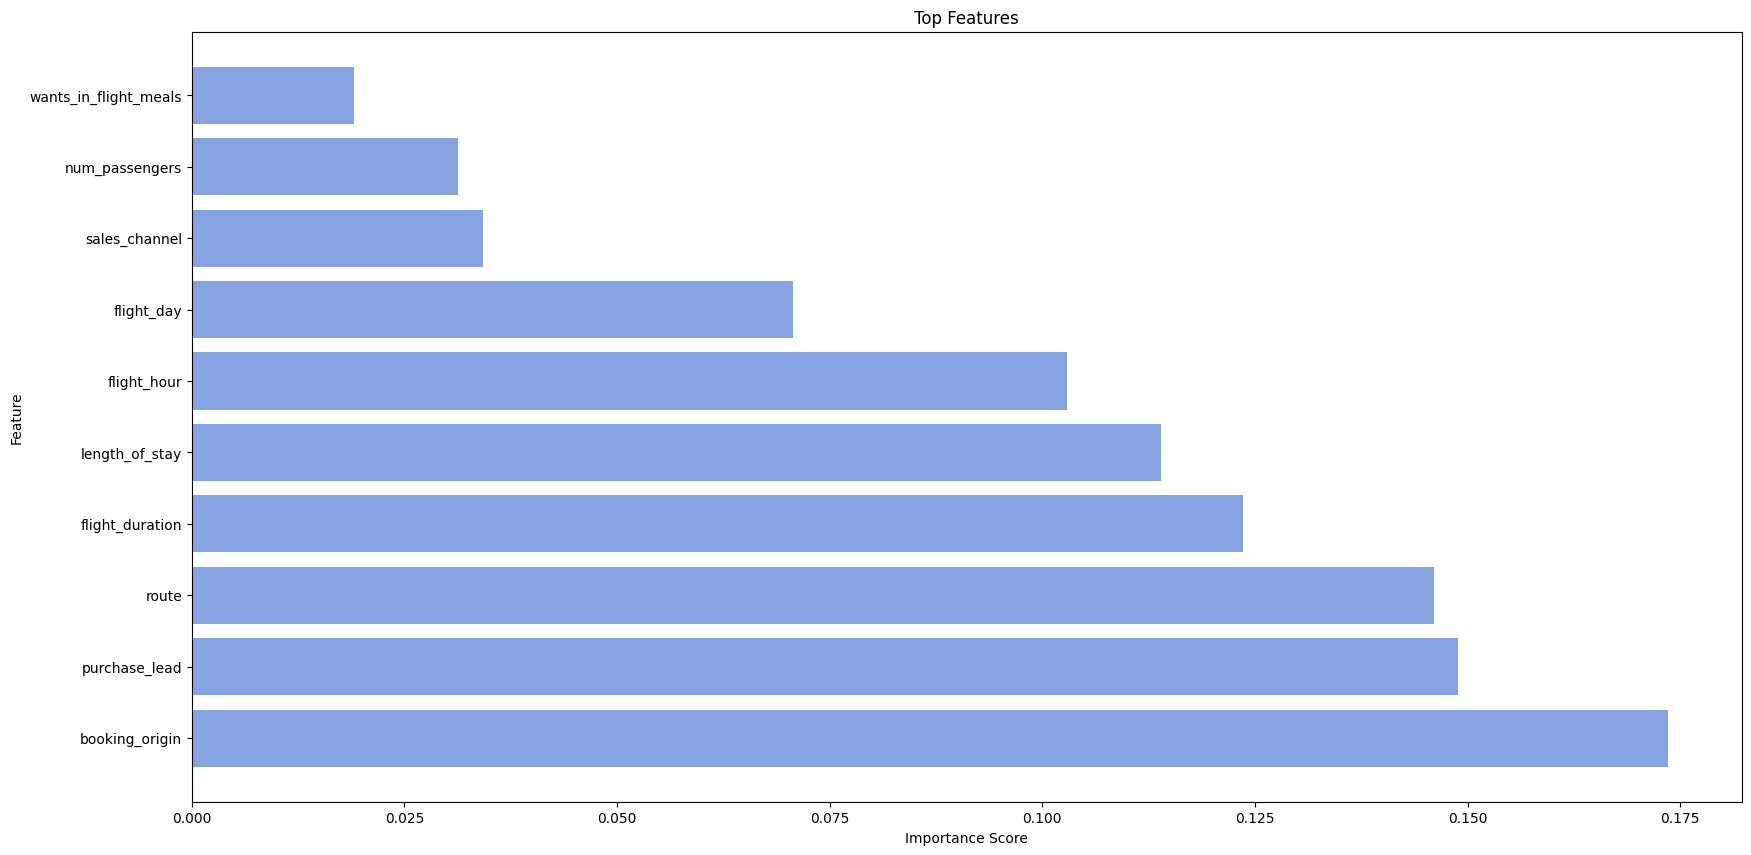

In [33]:
# Create a horizontal bar chart
plt.figure(figsize=(20,10))  # Set the figure size
color = (0.2, # redness
         0.4, # greenness
         0.8, # blueness
         0.6 # transparency
         )

plt.barh(top_features_df['Feature'], top_features_df['Importance'], color=color)  # Create horizontal bars

# Add labels and title
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top Features')

# Show the plot
plt.show()

# **Selecting Top Features for Random Forest Classifier**
This code block selects the top features identified by the Random Forest classifier for both the training and testing datasets.

Selecting Top Features:
We extract the names of the top features identified in the Random Forest analysis (X_train_rf) from the columns of the scaled training data.
We create a new DataFrame (X_train_rf_selected) containing only the selected top features for the training data.
Similarly, we create a new DataFrame (X_test_rf_selected) for the testing data with the same selected top features.
Explanation:
The variable X_train_rf contains the names of the top features identified in the Random Forest analysis.
We create a DataFrame (X_train_rf_selected) for the scaled training data containing only the selected features.
Similarly, we create a DataFrame (X_test_rf_selected) for the scaled testing data with the same selected features.
This process allows us to focus on the most informative features identified by the Random Forest classifier, potentially improving the performance of our predictive model.

In [ ]:
# Selecting the top features identified by the Random Forest classifier for the training data

# Extracting the names of the top features from the scaled training data
X_train_rf = scaled_train_df.columns[top_ten_features_indices]

# Creating a new DataFrame containing only the selected top features for the training data
X_train_rf_selected = pd.DataFrame(scaled_train_df, columns=X_train_rf)

# Creating a new DataFrame for the testing data with the same selected top features
X_test_rf_selected = pd.DataFrame(scaled_test_df, columns=X_train_rf)

# Displaying the DataFrame containing the selected top features for the training data
X_train_rf_selected


# **Evaluating Feature Selection Methods**
This code block evaluates Logistic Regression models trained with features selected based on different methods: variance threshold, SelectKBest, and Random Forest.

Variance Threshold Method:
We fit a Logistic Regression model using features selected based on a variance threshold.
Predictions are made on the test data using the trained model.
We generate a classification report to assess the model's performance.
SelectKBest Method:
Similar steps are repeated for features selected based on the SelectKBest method.
Random Forest Method:
Again, similar steps are repeated for features selected based on the Random Forest method.
These evaluations help determine which feature selection method yields the best performance for the Logistic Regression model.

Let me know if you need further explanation or assistance!

In [38]:
X_train_variance_selected
X_test_variance_selected

eval_model = LogisticRegression()

eval_model.fit(X_train_variance_selected,y_train)

y_pred_variance_selected = eval_model.predict(X_test_variance_selected)

report_variance_selected = classification_report(y_test, y_pred_variance_selected)

print("Classification Report: Variance Selected")
print(report_variance_selected)

Classification Report: Variance Selected
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      8505
           1       0.61      0.64      0.62      8504

    accuracy                           0.62     17009
   macro avg       0.62      0.62      0.62     17009
weighted avg       0.62      0.62      0.62     17009



In [39]:
X_train_kbest_selected
X_test_kbest_selected

eval_model = LogisticRegression()

eval_model.fit(X_train_kbest_selected,y_train)

y_pred_kbest_selected = eval_model.predict(X_test_kbest_selected)

report_kbest_selected = classification_report(y_test, y_pred_kbest_selected)

print("Classification Report: KBest Selection")
print(report_kbest_selected)

Classification Report: KBest Selection
              precision    recall  f1-score   support

           0       0.67      0.61      0.63      8505
           1       0.64      0.70      0.67      8504

    accuracy                           0.65     17009
   macro avg       0.65      0.65      0.65     17009
weighted avg       0.65      0.65      0.65     17009



In [40]:
X_train_rf_selected
X_test_rf_selected

eval_model = LogisticRegression()

eval_model.fit(X_train_rf_selected,y_train)

y_pred_rf_selected = eval_model.predict(X_test_rf_selected)

report_rf_selected = classification_report(y_test, y_pred_rf_selected)

print("Classification Report: Random Forest Selection")
print(report_rf_selected)

Classification Report: Random Forest Selection
              precision    recall  f1-score   support

           0       0.67      0.61      0.63      8505
           1       0.64      0.69      0.67      8504

    accuracy                           0.65     17009
   macro avg       0.65      0.65      0.65     17009
weighted avg       0.65      0.65      0.65     17009



In [42]:
# Initialize a Random Forest classifier with 100 trees and a random state of 42
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier on the training data with features selected based on Random Forest
random_forest.fit(X_train_rf_selected, y_train)

# Predict labels for the test set using the trained Random Forest model
y_pred_rf_selected = random_forest.predict(X_test_rf_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_rf_selected)
print("Accuracy:", accuracy)

# Generate and print the classification report for the Random Forest model with features selected based on Random Forest
report = classification_report(y_test, y_pred_rf_selected)
print("Classification Report: Random Forest Selection")
print(report)



Accuracy: 0.8344993826797578
Classification Report: Random Forest Selection
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      8505
           1       0.78      0.92      0.85      8504

    accuracy                           0.83     17009
   macro avg       0.85      0.83      0.83     17009
weighted avg       0.85      0.83      0.83     17009



# **Cross-Validation for Random Forest Classifier**
This code block performs 5-fold cross-validation using the cross_val_score function on the Random Forest classifier (random_forest) with the entire dataset (X and y). It calculates the accuracy for each fold and stores the scores in the cv_accuracy array. Then, it initializes a Random Forest classifier with 100 trees and prints the cross-validation accuracy scores. Additionally, it calculates and prints the mean accuracy across all folds.

In [44]:

# Perform 5-fold cross-validation and calculate accuracy
cv_accuracy = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')


# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Print cross-validation accuracy scores
print("Cross-validation Accuracy:", cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())

Cross-validation Accuracy: [0.86889101 0.87543176 0.87014037 0.87036084 0.873374  ]
Mean Accuracy: 0.8716395972661131


# **Summary**

Our objective in conducting this project was to find out the booking tendency of British Airways customers to book prior to completing the booking. This project can also help in targeting the most likely customers.
We used data provided by the British Airways from Forage to do the project. During the process we cleaned the data, we split into target and predictor, encoded the date using label encoding, resampled using SMOTE and scaled using the Standard scaler. We trained our model on the Random Forest algorithm. I was able to build a model with 0.8 accuracy. In this model the most important feature is the booking origin. This model seems suitable enough but further work will be done to certify that no mistakes were made. I acknowlede Forage and the British airways for providing the data and the guide to completing this project.
